<a href="https://colab.research.google.com/github/Pritam-BA/DAY1/blob/main/DAY11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

def create_amazon_india_sales_data():
    """Create realistic Amazon India seasonal sales dataset"""
    # Generate full year of daily data
    date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
    n_days = len(date_range)

    base_daily_sales = 20000  # Base daily sales in INR

    data = []

    for date in date_range:
        month = date.month
        day_of_week = date.weekday()  # Monday=0, Sunday=6

        # Seasonal multipliers based on Indian shopping patterns
        seasonal_factor = 1.0
        if month in [10, 11]:  # Festival season (Diwali, Dussehra)
            seasonal_factor = 1.5
        elif month == 12:      # Christmas and New Year
            seasonal_factor = 1.6
        elif month == 5:       # Summer sales
            seasonal_factor = 1.3
        elif month == 8:       # Independence Day sales
            seasonal_factor = 1.2

        # Weekend effect (higher sales on Saturday and Sunday)
        weekend_factor = 1.2 if day_of_week >= 5 else 1.0

        # Add random variation
        random_factor = np.random.uniform(0.8, 1.2)

        # Calculate final sales
        daily_sales = base_daily_sales * seasonal_factor * weekend_factor * random_factor

        data.append({
            'date': date,
            'sales': round(daily_sales, 2),
            'month': month,
            'day_of_week': day_of_week,
            'is_weekend': day_of_week >= 5
        })

    return pd.DataFrame(data)

# Create the dataset
sales_data = create_amazon_india_sales_data()
print("Amazon India Daily Sales Dataset Created!")
print(f"Dataset Shape: {sales_data.shape}")
print("\nFirst 5 records:")
print(sales_data.head())

Amazon India Daily Sales Dataset Created!
Dataset Shape: (366, 5)

First 5 records:
        date     sales  month  day_of_week  is_weekend
0 2024-01-01  18996.32      1            0       False
1 2024-01-02  23605.71      1            1       False
2 2024-01-03  21855.95      1            2       False
3 2024-01-04  20789.27      1            3       False
4 2024-01-05  17248.15      1            4       False


In [ ]:
print("\n" + "="*60)
print("=== BASIC DATE OPERATIONS ===")
print("="*60)

# Ensure date column is properly formatted as datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Extract various date components
sales_data['year'] = sales_data['date'].dt.year
sales_data['month_name'] = sales_data['date'].dt.strftime('%B')
sales_data['day_name'] = sales_data['date'].dt.strftime('%A')
sales_data['quarter'] = sales_data['date'].dt.quarter

# Show date component extraction
print("Date Components Extracted:")
sample_dates = sales_data[['date', 'year', 'month_name', 'day_name', 'quarter']].head()
print(sample_dates)

# Basic date information
print(f"\nDataset Date Range:")
print(f"Start Date: {sales_data['date'].min()}")
print(f"End Date: {sales_data['date'].max()}")
print(f"Total Days: {len(sales_data)}")
print(f"Date Range: {(sales_data['date'].max() - sales_data['date'].min()).days} days")



=== BASIC DATE OPERATIONS ===
Date Components Extracted:
        date  year month_name   day_name  quarter
0 2024-01-01  2024    January     Monday        1
1 2024-01-02  2024    January    Tuesday        1
2 2024-01-03  2024    January  Wednesday        1
3 2024-01-04  2024    January   Thursday        1
4 2024-01-05  2024    January     Friday        1

Dataset Date Range:
Start Date: 2024-01-01 00:00:00
End Date: 2024-12-31 00:00:00
Total Days: 366
Date Range: 365 days


In [ ]:
print("\n" + "="*60)
print("=== TIME-BASED AGGREGATIONS ===")
print("="*60)

# Set date as index for resampling
sales_indexed = sales_data.set_index('date')

# Monthly aggregation using resample
monthly_sales = sales_indexed.resample('M')['sales'].agg(['sum', 'mean', 'count']).reset_index()
monthly_sales.columns = ['date', 'total_sales', 'avg_daily_sales', 'days_count']
monthly_sales['month_name'] = monthly_sales['date'].dt.strftime('%B')

print("Monthly Sales Aggregation:")
print(monthly_sales[['month_name', 'total_sales', 'avg_daily_sales']].round(2))

# Weekly aggregation
weekly_sales = sales_indexed.resample('W')['sales'].sum().reset_index()
print(f"\nWeekly Sales (first 5 weeks):")
print(weekly_sales.head())

# Quarterly aggregation
quarterly_sales = sales_indexed.resample('Q')['sales'].agg(['sum', 'mean']).reset_index()
quarterly_sales['quarter'] = quarterly_sales['date'].dt.quarter
quarterly_sales.columns = ['date', 'total_sales', 'avg_daily_sales', 'quarter']

print(f"\nQuarterly Sales Summary:")
print(quarterly_sales[['quarter', 'total_sales', 'avg_daily_sales']].round(2))



=== TIME-BASED AGGREGATIONS ===
Monthly Sales Aggregation:
   month_name  total_sales  avg_daily_sales
0     January    636325.08         20526.62
1    February    612065.92         21105.72
2       March    652111.93         21035.87
3       April    635244.25         21174.81
4         May    830086.64         26776.99
5        June    624537.04         20817.90
6        July    657826.78         21220.22
7      August    793410.59         25593.89
8   September    664110.69         22137.02
9     October    961215.56         31006.95
10   November    942283.80         31409.46
11   December   1038035.01         33485.00

Weekly Sales (first 5 weeks):
        date      sales
0 2024-01-07  142950.55
1 2024-01-14  153756.78
2 2024-01-21  140078.98
3 2024-01-28  141567.49
4 2024-02-04  148635.25

Quarterly Sales Summary:
   quarter  total_sales  avg_daily_sales
0        1   1900502.93         20884.65
1        2   2089867.93         22965.58
2        3   2115348.06         22992.91
3  

In [ ]:
print("\n" + "="*60)
print("=== SEASONAL PATTERN ANALYSIS ===")
print("="*60)

# Monthly seasonal analysis
monthly_patterns = sales_data.groupby('month').agg({
    'sales': ['mean', 'sum', 'std'],
    'date': 'count'
}).round(2)
monthly_patterns.columns = ['avg_daily_sales', 'total_monthly_sales', 'sales_volatility', 'days_in_month']

# Add month names for better readability
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_patterns['month_name'] = monthly_patterns.index.map(month_names)

print("Monthly Seasonal Patterns:")
print(monthly_patterns[['month_name', 'avg_daily_sales', 'sales_volatility']])

# Identify peak and low seasons
peak_month = monthly_patterns['avg_daily_sales'].idxmax()
low_month = monthly_patterns['avg_daily_sales'].idxmin()

print(f"\nSeasonal Insights:")
print(f"Peak Season: {month_names[peak_month]} (Avg Daily Sales: ₹{monthly_patterns.loc[peak_month, 'avg_daily_sales']:,.2f})")
print(f"Low Season: {month_names[low_month]} (Avg Daily Sales: ₹{monthly_patterns.loc[low_month, 'avg_daily_sales']:,.2f})")
print(f"Seasonal Variation: {((monthly_patterns.loc[peak_month, 'avg_daily_sales'] / monthly_patterns.loc[low_month, 'avg_daily_sales']) - 1) * 100:.1f}%")

# Day-of-week patterns
day_patterns = sales_data.groupby('day_name')['sales'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print(f"\nDay-of-Week Patterns:")
for day, avg_sales in day_patterns.items():
    print(f"{day}: ₹{avg_sales:,.2f}")

# Weekend vs Weekday analysis
weekend_analysis = sales_data.groupby('is_weekend')['sales'].agg(['mean', 'count']).round(2)
weekend_analysis.index = ['Weekday', 'Weekend']
print(f"\nWeekend vs Weekday Analysis:")
print(weekend_analysis)



=== SEASONAL PATTERN ANALYSIS ===
Monthly Seasonal Patterns:
      month_name  avg_daily_sales  sales_volatility
month                                              
1            Jan         20526.62           2629.77
2            Feb         21105.72           3779.14
3            Mar         21035.87           3178.57
4            Apr         21174.81           2942.54
5            May         26776.99           3639.21
6            Jun         20817.90           2603.12
7            Jul         21220.22           2215.15
8            Aug         25593.89           2733.53
9            Sep         22137.02           3072.64
10           Oct         31006.95           4112.64
11           Nov         31409.46           5131.21
12           Dec         33485.00           3916.44

Seasonal Insights:
Peak Season: Dec (Avg Daily Sales: ₹33,485.00)
Low Season: Jan (Avg Daily Sales: ₹20,526.62)
Seasonal Variation: 63.1%

Day-of-Week Patterns:
Monday: ₹23,841.04
Tuesday: ₹23,568.44
Wednesday

In [ ]:
print("\n" + "="*60)
print("=== ADVANCED TIME SERIES ANALYSIS ===")
print("="*60)

# Calculate moving averages for trend analysis
sales_data_sorted = sales_data.sort_values('date').reset_index(drop=True)
sales_data_sorted['sales_7day_ma'] = sales_data_sorted['sales'].rolling(window=7).mean()
sales_data_sorted['sales_30day_ma'] = sales_data_sorted['sales'].rolling(window=30).mean()

# Growth rates
monthly_sales_sorted = monthly_sales.sort_values('date')
monthly_sales_sorted['month_over_month_growth'] = monthly_sales_sorted['total_sales'].pct_change() * 100

print("Month-over-Month Growth Rates:")
growth_data = monthly_sales_sorted[['month_name', 'month_over_month_growth']].dropna()
print(growth_data.round(2))

# Year-over-year would require multiple years of data
# For demonstration, calculate quarter-over-quarter growth
quarterly_sales_sorted = quarterly_sales.sort_values('date')
quarterly_sales_sorted['quarter_over_quarter_growth'] = quarterly_sales_sorted['total_sales'].pct_change() * 100

print(f"\nQuarter-over-Quarter Growth:")
print(quarterly_sales_sorted[['quarter', 'quarter_over_quarter_growth']].round(2))

# Identify outliers in daily sales
Q1 = sales_data['sales'].quantile(0.25)
Q3 = sales_data['sales'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_high = Q3 + 1.5 * IQR
outlier_threshold_low = Q1 - 1.5 * IQR

outliers = sales_data[(sales_data['sales'] > outlier_threshold_high) |
                     (sales_data['sales'] < outlier_threshold_low)]

print(f"\nOutlier Analysis:")
print(f"High sales outliers (>{outlier_threshold_high:,.0f}): {len(outliers[outliers['sales'] > outlier_threshold_high])}")
print(f"Low sales outliers (<{outlier_threshold_low:,.0f}): {len(outliers[outliers['sales'] < outlier_threshold_low])}")

if len(outliers) > 0:
    print("\nOutlier dates and reasons:")
    outlier_analysis = outliers.groupby(['month_name', 'day_name']).size()
    print(outlier_analysis.head())



=== ADVANCED TIME SERIES ANALYSIS ===
Month-over-Month Growth Rates:
   month_name  month_over_month_growth
1    February                    -3.81
2       March                     6.54
3       April                    -2.59
4         May                    30.67
5        June                   -24.76
6        July                     5.33
7      August                    20.61
8   September                   -16.30
9     October                    44.74
10   November                    -1.97
11   December                    10.16

Quarter-over-Quarter Growth:
   quarter  quarter_over_quarter_growth
0        1                          NaN
1        2                         9.96
2        3                         1.22
3        4                        39.06

Outlier Analysis:
High sales outliers (>38,854): 9
Low sales outliers (<9,999): 0

Outlier dates and reasons:
month_name  day_name
December    Saturday    1
            Sunday      2
November    Saturday    1
            Sunday    

In [ ]:
print("\n" + "="*60)
print("=== BUSINESS INTELLIGENCE INSIGHTS ===")
print("="*60)

# Sales concentration analysis
total_annual_sales = sales_data['sales'].sum()
monthly_contribution = monthly_patterns['total_monthly_sales'] / total_annual_sales * 100

print("Monthly Sales Contribution (% of Annual Sales):")
for month, contribution in monthly_contribution.items():
    month_name = month_names[month]
    print(f"{month_name}: {contribution:.1f}%")

# Festival season impact
festival_months = [10, 11, 12]  # Oct, Nov, Dec
festival_sales = sales_data[sales_data['month'].isin(festival_months)]['sales'].sum()
festival_contribution = (festival_sales / total_annual_sales) * 100

print(f"\nFestival Season Analysis (Oct-Dec):")
print(f"Festival Season Sales: ₹{festival_sales:,.2f}")
print(f"Festival Season Contribution: {festival_contribution:.1f}% of annual sales")

# Peak sales periods identification
sales_data['sales_percentile'] = sales_data['sales'].rank(pct=True)
peak_sales_days = sales_data[sales_data['sales_percentile'] >= 0.9]

print(f"\nTop 10% Sales Days Analysis:")
peak_month_distribution = peak_sales_days['month_name'].value_counts()
print("Distribution by month:")
print(peak_month_distribution.head())

peak_day_distribution = peak_sales_days['day_name'].value_counts()
print("\nDistribution by day of week:")
print(peak_day_distribution)

# Inventory planning recommendations
inventory_multipliers = monthly_patterns['avg_daily_sales'] / monthly_patterns['avg_daily_sales'].mean()

print(f"\nInventory Planning Multipliers (vs average month):")
for month, multiplier in inventory_multipliers.items():
    month_name = month_names[month]
    if multiplier > 1.2:
        recommendation = "HIGH inventory needed"
    elif multiplier < 0.9:
        recommendation = "LOW inventory sufficient"
    else:
        recommendation = "NORMAL inventory levels"

    print(f"{month_name}: {multiplier:.2f}x ({recommendation})")



=== BUSINESS INTELLIGENCE INSIGHTS ===
Monthly Sales Contribution (% of Annual Sales):
Jan: 7.0%
Feb: 6.8%
Mar: 7.2%
Apr: 7.0%
May: 9.2%
Jun: 6.9%
Jul: 7.3%
Aug: 8.8%
Sep: 7.3%
Oct: 10.6%
Nov: 10.4%
Dec: 11.5%

Festival Season Analysis (Oct-Dec):
Festival Season Sales: ₹2,941,534.37
Festival Season Contribution: 32.5% of annual sales

Top 10% Sales Days Analysis:
Distribution by month:
month_name
December    17
November    11
October      8
May          1
Name: count, dtype: int64

Distribution by day of week:
day_name
Sunday       11
Saturday     10
Monday        5
Wednesday     4
Tuesday       3
Thursday      2
Friday        2
Name: count, dtype: int64

Inventory Planning Multipliers (vs average month):
Jan: 0.83x (LOW inventory sufficient)
Feb: 0.85x (LOW inventory sufficient)
Mar: 0.85x (LOW inventory sufficient)
Apr: 0.86x (LOW inventory sufficient)
May: 1.08x (NORMAL inventory levels)
Jun: 0.84x (LOW inventory sufficient)
Jul: 0.86x (LOW inventory sufficient)
Aug: 1.04x (NORMAL 

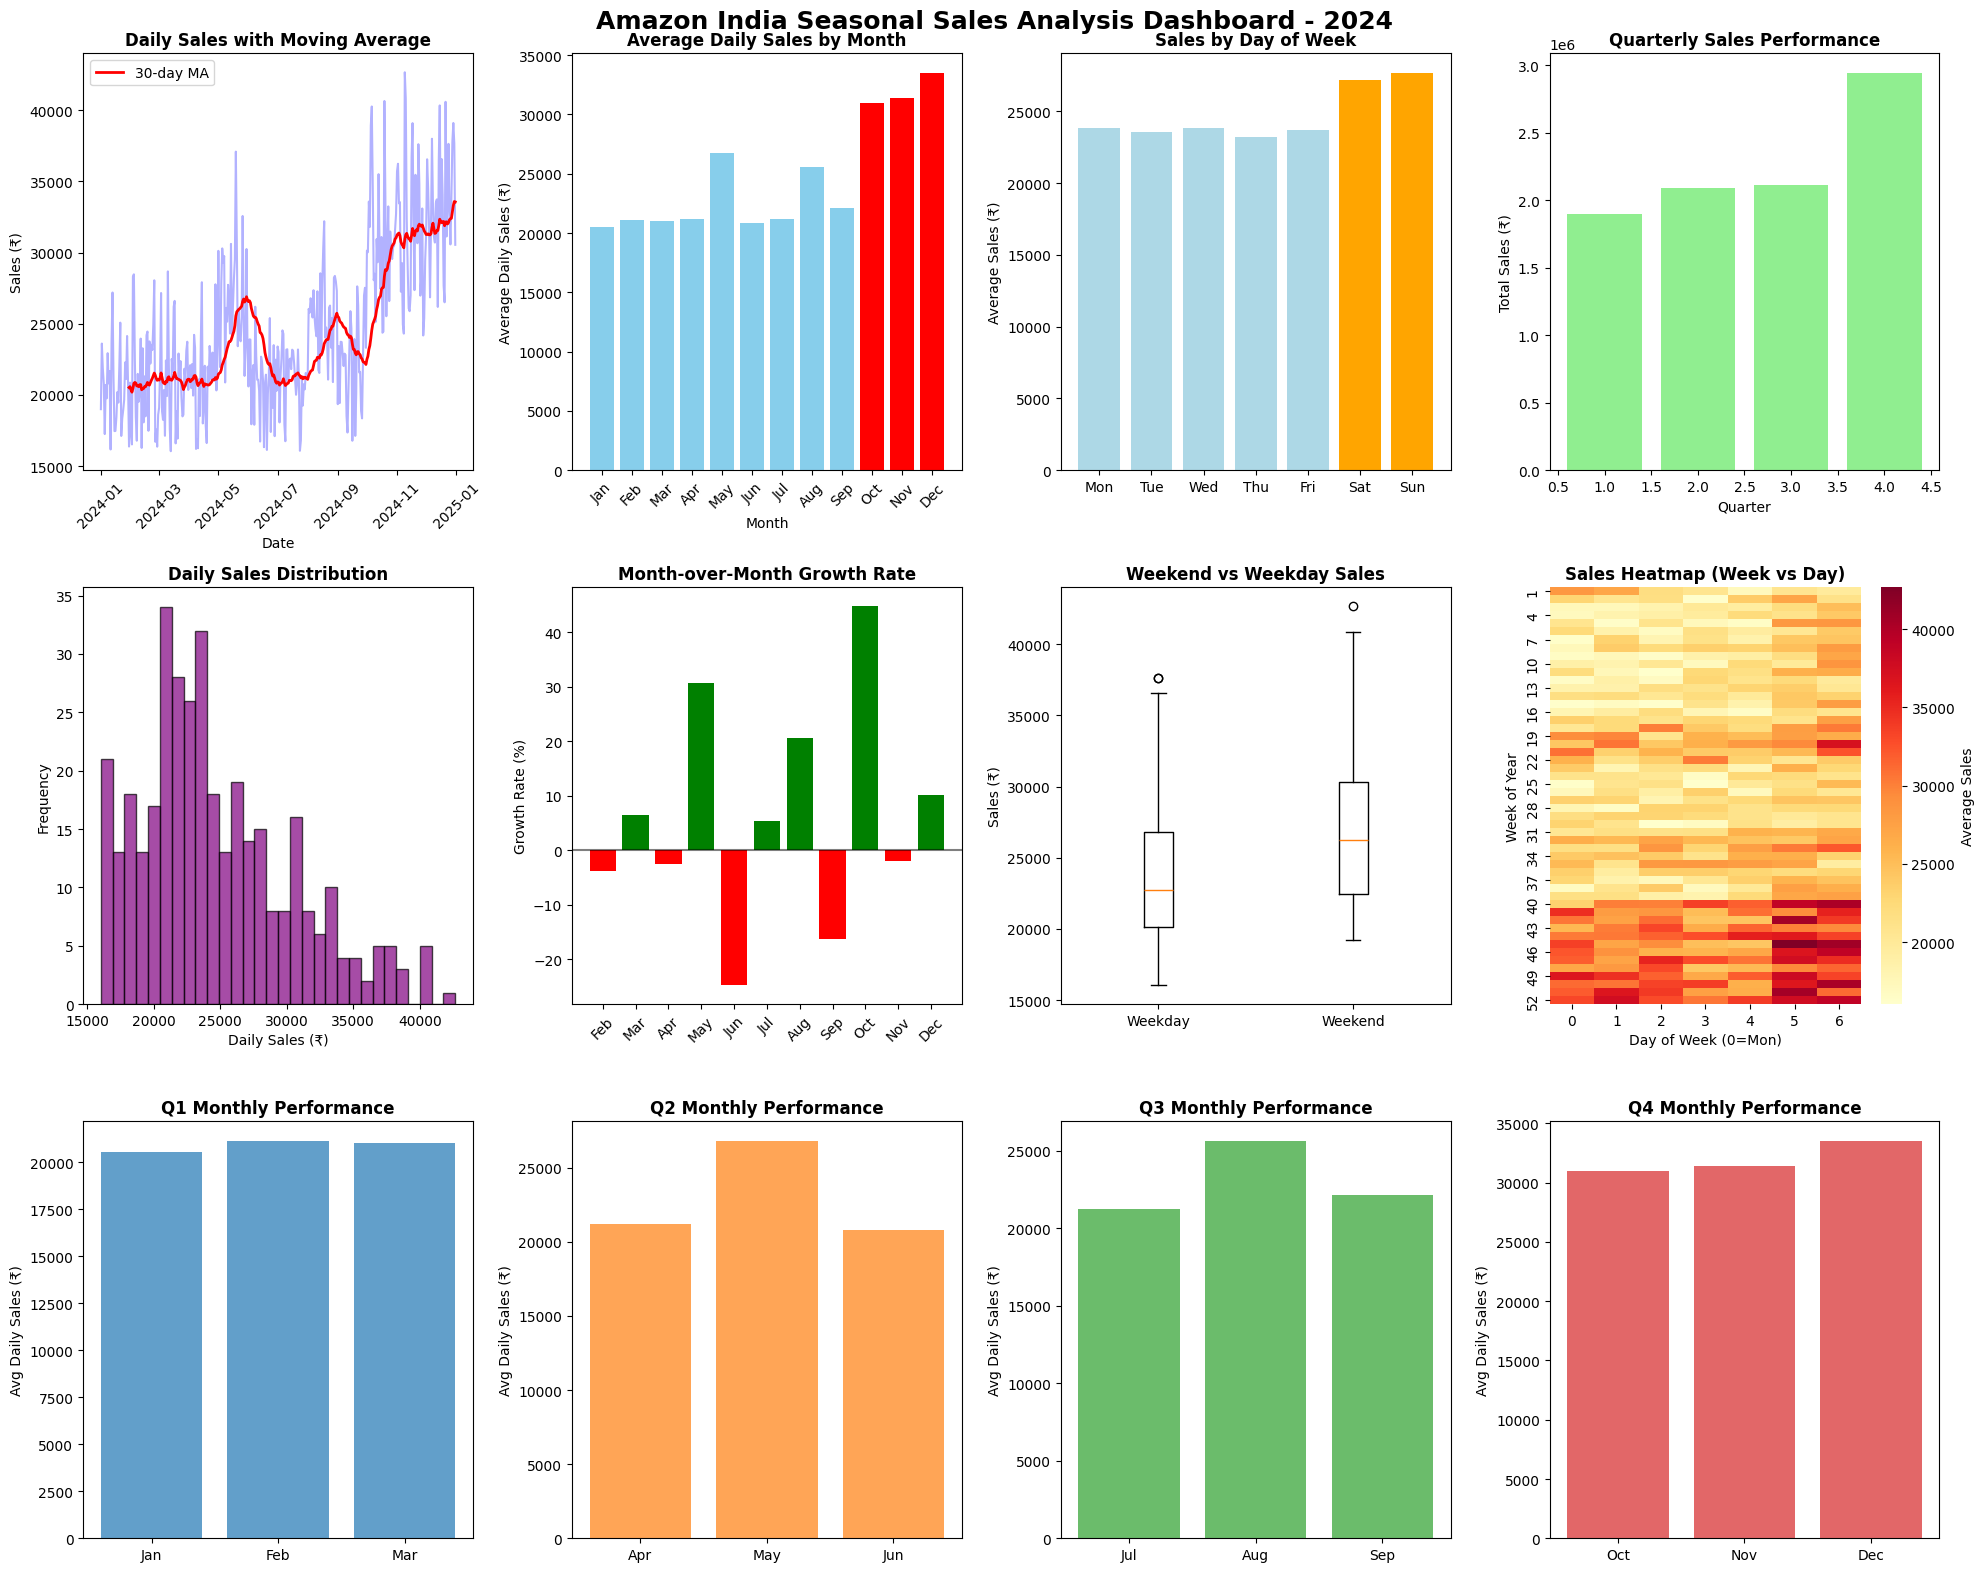


=== KEY PERFORMANCE INDICATORS ===
📊 Total Annual Sales: ₹9,047,253.29
📈 Average Daily Sales: ₹24,719.27
🎯 Peak Month: Dec (₹33,485.00/day)
📉 Low Month: Jan (₹20,526.62/day)
🏆 Weekend Boost: 16.0%
🎄 Festival Season Share: 32.5% of annual sales


In [ ]:
# Create comprehensive time series visualization dashboard
plt.style.use('default')
fig = plt.figure(figsize=(20, 16))

# 1. Daily Sales Trend
ax1 = plt.subplot(3, 4, 1)
plt.plot(sales_data_sorted['date'], sales_data_sorted['sales'], alpha=0.3, color='blue')
plt.plot(sales_data_sorted['date'], sales_data_sorted['sales_30day_ma'], color='red', linewidth=2, label='30-day MA')
plt.title('Daily Sales with Moving Average', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales (₹)')
plt.legend()
plt.xticks(rotation=45)

# 2. Monthly Sales Bar Chart
ax2 = plt.subplot(3, 4, 2)
monthly_data = monthly_patterns.reset_index()
colors = ['red' if x in [10, 11, 12] else 'skyblue' for x in monthly_data.index + 1]
plt.bar(monthly_data.index, monthly_patterns['avg_daily_sales'], color=colors)
plt.title('Average Daily Sales by Month', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Daily Sales (₹)')
plt.xticks(monthly_data.index, [month_names[i+1] for i in monthly_data.index], rotation=45)

# 3. Day of Week Analysis
ax3 = plt.subplot(3, 4, 3)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = [day_patterns[day] for day in day_order]
colors = ['orange' if day in ['Saturday', 'Sunday'] else 'lightblue' for day in day_order]
plt.bar(range(7), day_sales, color=colors)
plt.title('Sales by Day of Week', fontweight='bold')
plt.xticks(range(7), [d[:3] for d in day_order])
plt.ylabel('Average Sales (₹)')

# 4. Quarterly Performance
ax4 = plt.subplot(3, 4, 4)
plt.bar(quarterly_sales['quarter'], quarterly_sales['total_sales'], color='lightgreen')
plt.title('Quarterly Sales Performance', fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (₹)')

# 5. Sales Distribution
ax5 = plt.subplot(3, 4, 5)
plt.hist(sales_data['sales'], bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Daily Sales Distribution', fontweight='bold')
plt.xlabel('Daily Sales (₹)')
plt.ylabel('Frequency')

# 6. Month-over-Month Growth
ax6 = plt.subplot(3, 4, 6)
growth_data_clean = monthly_sales_sorted.dropna()
colors = ['green' if x > 0 else 'red' for x in growth_data_clean['month_over_month_growth']]
plt.bar(range(len(growth_data_clean)), growth_data_clean['month_over_month_growth'], color=colors)
plt.title('Month-over-Month Growth Rate', fontweight='bold')
plt.ylabel('Growth Rate (%)')
plt.xticks(range(len(growth_data_clean)),
           [month_names[i] for i in growth_data_clean['date'].dt.month], rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

# 7. Weekend vs Weekday Box Plot
ax7 = plt.subplot(3, 4, 7)
weekend_data = [sales_data[sales_data['is_weekend'] == False]['sales'],
                sales_data[sales_data['is_weekend'] == True]['sales']]
plt.boxplot(weekend_data, labels=['Weekday', 'Weekend'])
plt.title('Weekend vs Weekday Sales', fontweight='bold')
plt.ylabel('Sales (₹)')

# 8. Seasonal Heatmap
ax8 = plt.subplot(3, 4, 8)
sales_pivot = sales_data.pivot_table(values='sales', index=sales_data['date'].dt.isocalendar().week,
                                    columns=sales_data['date'].dt.dayofweek, aggfunc='mean')
sns.heatmap(sales_pivot, cmap='YlOrRd', cbar_kws={'label': 'Average Sales'})
plt.title('Sales Heatmap (Week vs Day)', fontweight='bold')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Week of Year')

# 9-12. Individual Quarter Analysis
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
quarter_months = [[1,2,3], [4,5,6], [7,8,9], [10,11,12]]

for i, (quarter, months) in enumerate(zip(quarters, quarter_months)):
    ax = plt.subplot(3, 4, 9+i)
    quarter_data = sales_data[sales_data['month'].isin(months)]
    monthly_avg = quarter_data.groupby('month')['sales'].mean()
    month_labels = [month_names[m] for m in monthly_avg.index]
    plt.bar(range(len(monthly_avg)), monthly_avg.values, color=f'C{i}', alpha=0.7)
    plt.title(f'{quarter} Monthly Performance', fontweight='bold')
    plt.xticks(range(len(monthly_avg)), month_labels)
    plt.ylabel('Avg Daily Sales (₹)')

plt.suptitle('Amazon India Seasonal Sales Analysis Dashboard - 2024', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# Key Performance Indicators
print(f"\n=== KEY PERFORMANCE INDICATORS ===")
print(f"📊 Total Annual Sales: ₹{total_annual_sales:,.2f}")
print(f"📈 Average Daily Sales: ₹{sales_data['sales'].mean():,.2f}")
print(f"🎯 Peak Month: {month_names[peak_month]} (₹{monthly_patterns.loc[peak_month, 'avg_daily_sales']:,.2f}/day)")
print(f"📉 Low Month: {month_names[low_month]} (₹{monthly_patterns.loc[low_month, 'avg_daily_sales']:,.2f}/day)")
print(f"🏆 Weekend Boost: {((weekend_analysis.loc['Weekend', 'mean'] / weekend_analysis.loc['Weekday', 'mean']) - 1) * 100:.1f}%")
print(f"🎄 Festival Season Share: {festival_contribution:.1f}% of annual sales")